In [23]:
from mplsoccer import Pitch,VerticalPitch
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [24]:
data = pd.read_csv('45min.csv')


In [25]:
data
data['X'] = data['X']*1.2
data['Y'] = data['Y']*.8
data['X2'] = data['X2']*1.2
data['Y2'] = data['Y2']*.8

In [26]:
dataHome = data[data['Team'] == 'Home' ]
dataAway = data[data['Team'] == 'Away' ]

In [27]:
dataHome

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
8,Home,Chayawat,Pass,31,12,33.6,67.2,26.4,75.2
9,Home,Suphanan,Pass,31,12,32.4,74.4,33.6,60.8
10,Home,Chayawat,Pass,31,12,32.4,70.4,16.8,64.8
11,Home,Saksit,Pass,32,13,15.6,66.4,14.4,43.2
12,Home,Patiwat,Pass,32,13,14.4,40.8,15.6,23.2
...,...,...,...,...,...,...,...,...,...
168,Home,Eliandro,Pass,45,28,76.8,62.4,70.8,53.6
169,Home,Jaroensak,Pass,45,28,67.2,53.6,48.0,49.6
170,Home,Yuto,Pass,45,28,48.0,49.6,44.4,20.0
171,Home,Chaiyawat,Pass,45,28,56.4,36.8,36.0,69.6


In [28]:
dataHomeShot = dataHome[(dataHome['Event'] == 'ShotOnTarget') |  (dataHome['Event'] == 'ShotOffTarget') |
                         (dataHome['Event'] == 'ShotGetGoal') | (dataHome['Event'] == 'ShotBlock')]

In [ ]:
 dataHomeShot= dataHomeShot.reset_index()

In [29]:
 dataHomeShot

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
53,Home,Daisuke,ShotOffTarget,34,48,90.0,29.6,0.0,0.0


In [30]:
dataAwayShot = dataAway[(dataAway['Event'] == 'ShotOnTarget') |  (dataAway['Event'] == 'ShotOffTarget') |
                        (dataAway['Event'] == 'ShotGetGoal') | (dataAway['Event'] == 'ShotBlock')]

In [31]:
dataAwayShot

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
68,Away,Pakorn,ShotOnTarget,36,27,30.0,16.0,0.0,0.0
72,Away,Elias,ShotOffTarget,38,18,7.2,31.2,0.0,0.0


In [32]:
dataHomePass = dataHome[(dataHome['Event'] == 'Pass') |  (dataHome['Event'] == 'Through') |
                         (dataHome['Event'] == 'go') | (dataHome['Event'] == 'Cross')]
dataHomePass = dataHomePass.reset_index()
dataHomePass

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,8,Home,Chayawat,Pass,31,12,33.6,67.2,26.4,75.2
1,9,Home,Suphanan,Pass,31,12,32.4,74.4,33.6,60.8
2,10,Home,Chayawat,Pass,31,12,32.4,70.4,16.8,64.8
3,11,Home,Saksit,Pass,32,13,15.6,66.4,14.4,43.2
4,12,Home,Patiwat,Pass,32,13,14.4,40.8,15.6,23.2
...,...,...,...,...,...,...,...,...,...,...
78,158,Home,Chaiyawat,Cross,45,28,105.6,11.2,106.8,14.4
79,168,Home,Eliandro,Pass,45,28,76.8,62.4,70.8,53.6
80,169,Home,Jaroensak,Pass,45,28,67.2,53.6,48.0,49.6
81,170,Home,Yuto,Pass,45,28,48.0,49.6,44.4,20.0


In [33]:
dataAwayPass = dataAway[(dataAway['Event'] == 'Pass') |  (dataAway['Event'] == 'Through') |
                         (dataAway['Event'] == 'go') | (dataAway['Event'] == 'Cross')]
dataAwayPass = dataAwayPass.reset_index()
dataAwayPass

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,0,Away,Worawut,Cross,31,12,115.2,47.2,42.0,52.0
1,1,Away,Patino,Pass,31,12,42.0,52.8,51.6,56.0
2,2,Away,Siwakorn,Pass,31,12,52.8,56.0,39.6,60.0
3,3,Away,Bordin,Pass,31,12,40.8,57.6,49.2,51.2
4,4,Away,Siwakorn,Pass,31,12,51.6,54.4,56.4,46.4
5,5,Away,Go,Pass,31,12,55.2,44.8,52.8,60.0
6,6,Away,Siwakorn,Pass,31,12,49.2,62.4,54.0,72.8
7,7,Away,Jaturapat,Pass,31,12,52.8,72.0,39.6,72.0
8,15,Away,Go,Pass,32,13,67.2,12.0,80.4,24.0
9,16,Away,Elias,Pass,32,13,76.8,22.4,67.2,12.0


In [34]:
dataAwayDef= dataAway[(dataAway['Event'] == 'clear') |  (dataAway['Event'] == 'intercept') |
                         (dataAway['Event'] == 'getball') | (dataAway['Event'] == 'block')|
                      (dataAway['Event'] == 'yellow')| (dataAway['Event'] == 'foul')]
dataAwayDef = dataAwayDef.reset_index()
dataAwayDef

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,31,Away,Rochela,intercept,33,32,79.2,66.4,0.0,0.0
1,46,Away,Philip,getball,34,48,82.8,4.0,0.0,0.0
2,63,Away,Elias,intercept,36,27,66.0,31.2,0.0,0.0
3,82,Away,Philip,intercept,40,8,93.6,4.0,0.0,0.0
4,87,Away,Charyl,intercept,40,8,81.6,3.2,0.0,0.0
5,102,Away,Siwakorn,intercept,42,21,67.2,69.6,0.0,0.0
6,128,Away,Philip,intercept,43,16,50.4,24.0,0.0,0.0
7,133,Away,Elias,intercept,44,16,68.4,17.6,0.0,0.0
8,137,Away,Philip,intercept,44,16,68.4,9.6,0.0,0.0
9,144,Away,Philip,foul,44,16,45.6,8.0,0.0,0.0


In [35]:
dataHomeDef= dataHome[(dataHome['Event'] == 'clear') |  (dataHome['Event'] == 'intercept') |
                         (dataHome['Event'] == 'getball') | (dataHome['Event'] == 'block')|
                      (dataHome['Event'] == 'yellow')| (dataHome['Event'] == 'foul')]
dataHomeDef = dataHomeDef.reset_index()
dataHomeDef

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,20,Home,Suphanan,intercept,32,13,52.8,60.8,0.0,0.0
1,35,Home,Yuto,intercept,33,32,39.6,58.4,0.0,0.0
2,50,Home,Nopphon,intercept,34,48,45.6,28.0,0.0,0.0
3,55,Home,Aris,intercept,35,43,44.4,20.8,0.0,0.0
4,65,Home,Suphanan,intercept,36,27,37.2,50.4,0.0,0.0
5,66,Home,Chaiyawat,foul,36,27,31.2,15.2,0.0,0.0
6,70,Home,Saksit,intercept,38,18,6.0,36.0,0.0,0.0
7,89,Home,Nopphon,foul,41,25,45.6,52.0,0.0,0.0
8,95,Home,Aris,intercept,41,25,18.0,24.8,0.0,0.0
9,135,Home,Yuto,intercept,44,16,50.4,17.6,0.0,0.0


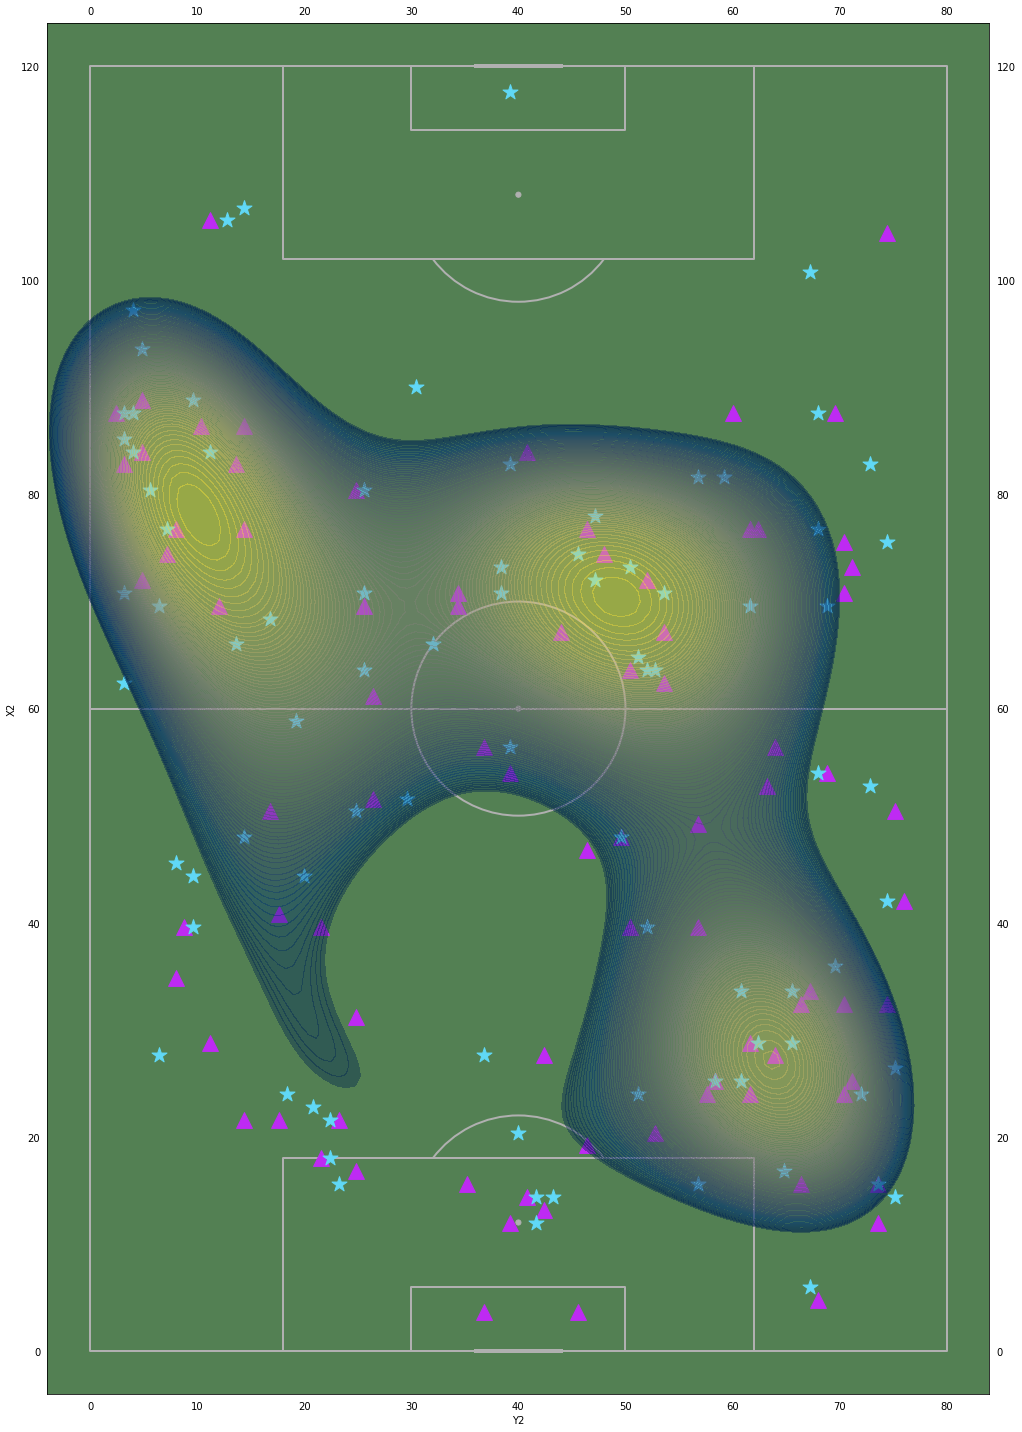

In [36]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataHomePass['Y'],dataHomePass['X'],c='#BE2AF3',s = 250,marker = "^")
plt.scatter(dataHomePass['Y2'],dataHomePass['X2'],c='#60D8F6',s = 250 ,marker = '*')

kde = sns.kdeplot(x = dataHomePass['Y2'], y = dataHomePass['X2'],
                  fill = True,shade_lowest= False,common_grid= False,
                  alpha=.4,thresh=.5,n_levels=100,cmap = 'cividis')

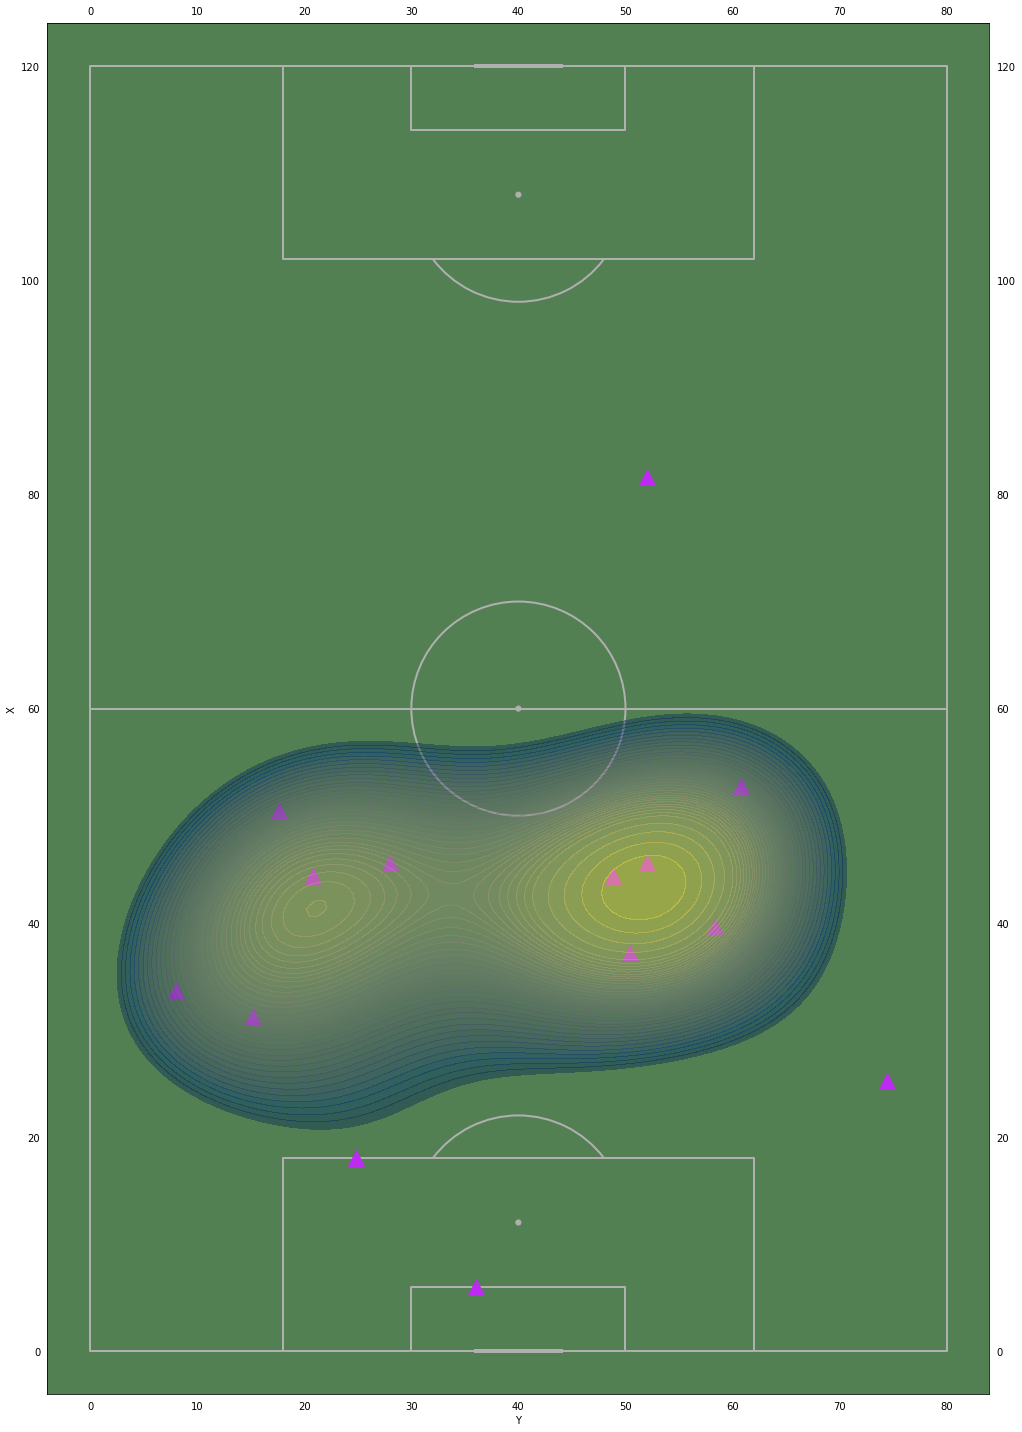

In [37]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataHomeDef['Y'],dataHomeDef['X'],c='#BE2AF3',s = 250,marker = "^")

kde = sns.kdeplot(x = dataHomeDef['Y'], y = dataHomeDef['X'],
                  fill = True,shade_lowest= False,common_grid= False,
                  alpha=.4,thresh=.5,n_levels=40,cmap = 'cividis')

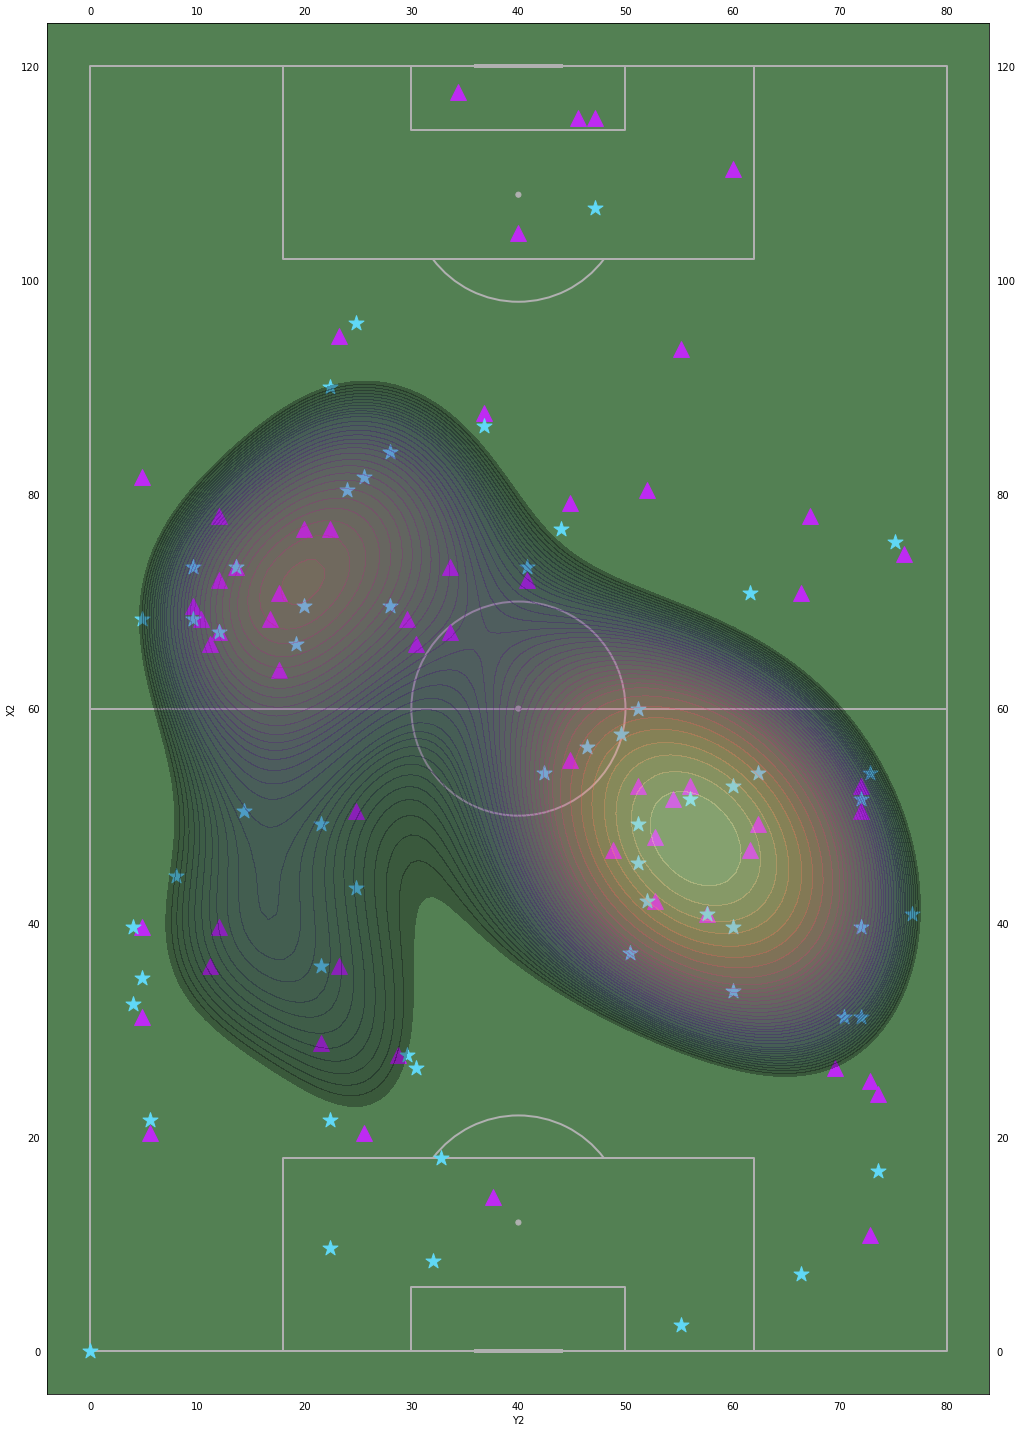

In [45]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataAwayPass['Y'],dataAwayPass['X'],c='#BE2AF3',s = 250,marker = "^")
plt.scatter(dataAwayPass['Y2'],dataAwayPass['X2'],c='#60D8F6',s = 250 ,marker = '*')

kde = sns.kdeplot(x = dataAwayPass['Y2'], y = dataAwayPass['X2'],
                  fill = True,shade_lowest=False,common_grid=False,
                  alpha=.3,thresh=.5,n_levels=40,cmap = 'magma')

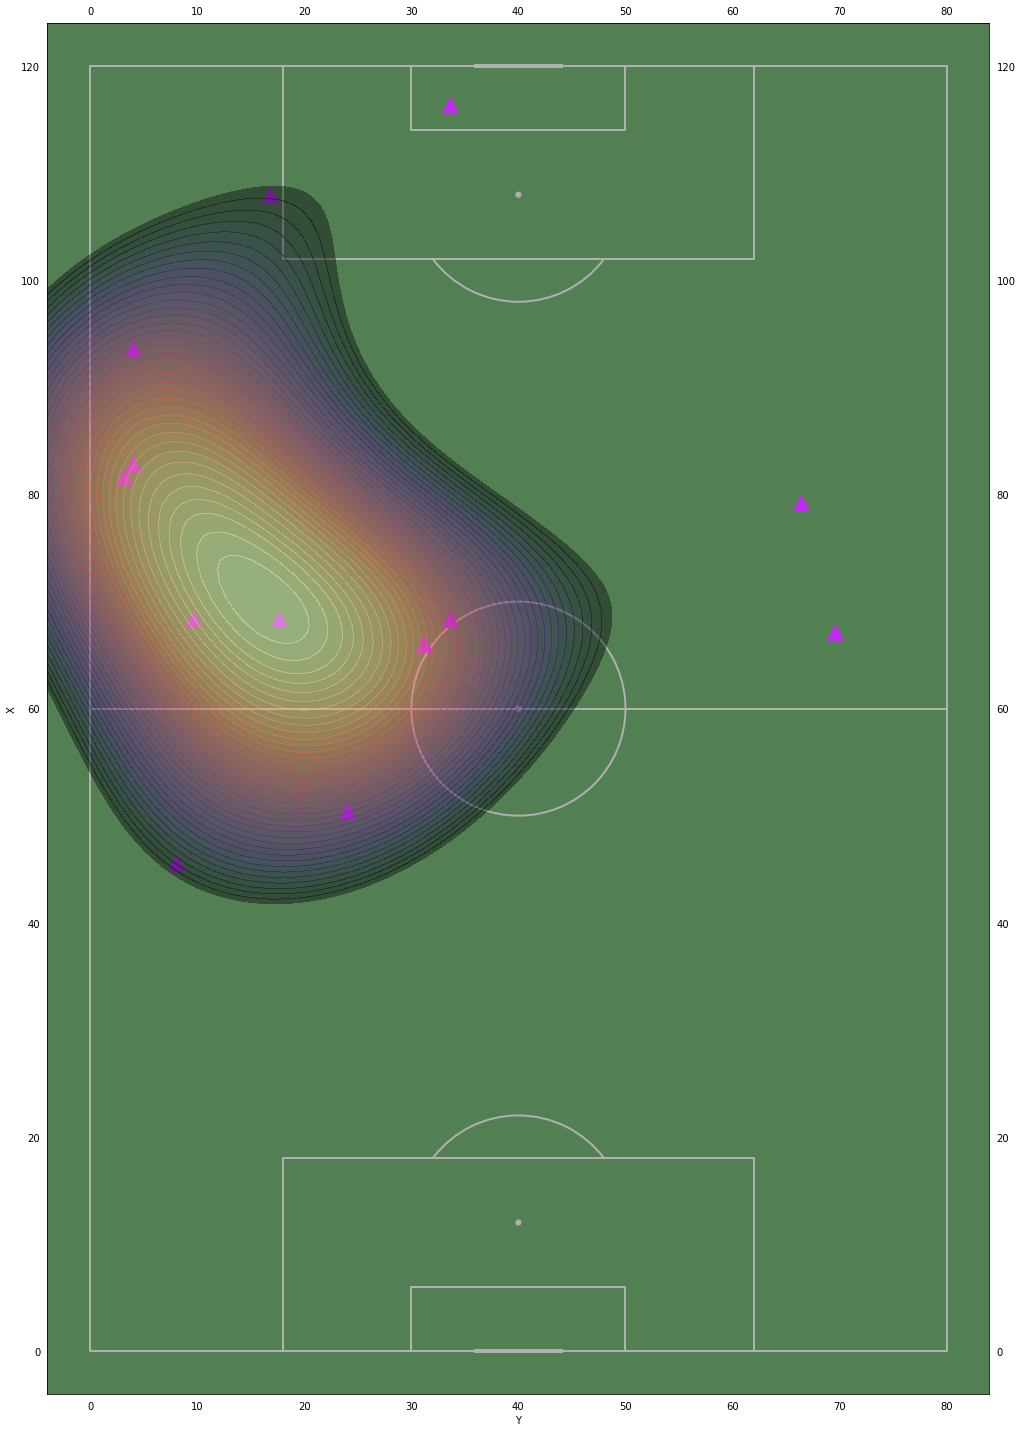

In [50]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataAwayDef['Y'],dataAwayDef['X'],c='#BE2AF3',s = 250,marker = "^")

kde = sns.kdeplot(x = dataAwayDef['Y'], y = dataAwayDef['X'],
                  fill = True,shade_lowest= False,common_grid= True,
                  alpha=.4,thresh=.5,n_levels=40,cmap = 'magma')

In [39]:
pDrtxA = dataAwayPass['X']
pDrtyA = dataAwayPass['Y']
pDesxA = dataAwayPass['X2']
pDesyA = dataAwayPass['Y2']
pStyA = dataAwayPass['Event']

In [40]:
pDrtxH = dataHomePass['X']
pDrtyH = dataHomePass['Y']
pDesxH = dataHomePass['X2']
pDesyH = dataHomePass['Y2']
pStyH = dataHomePass['Event']

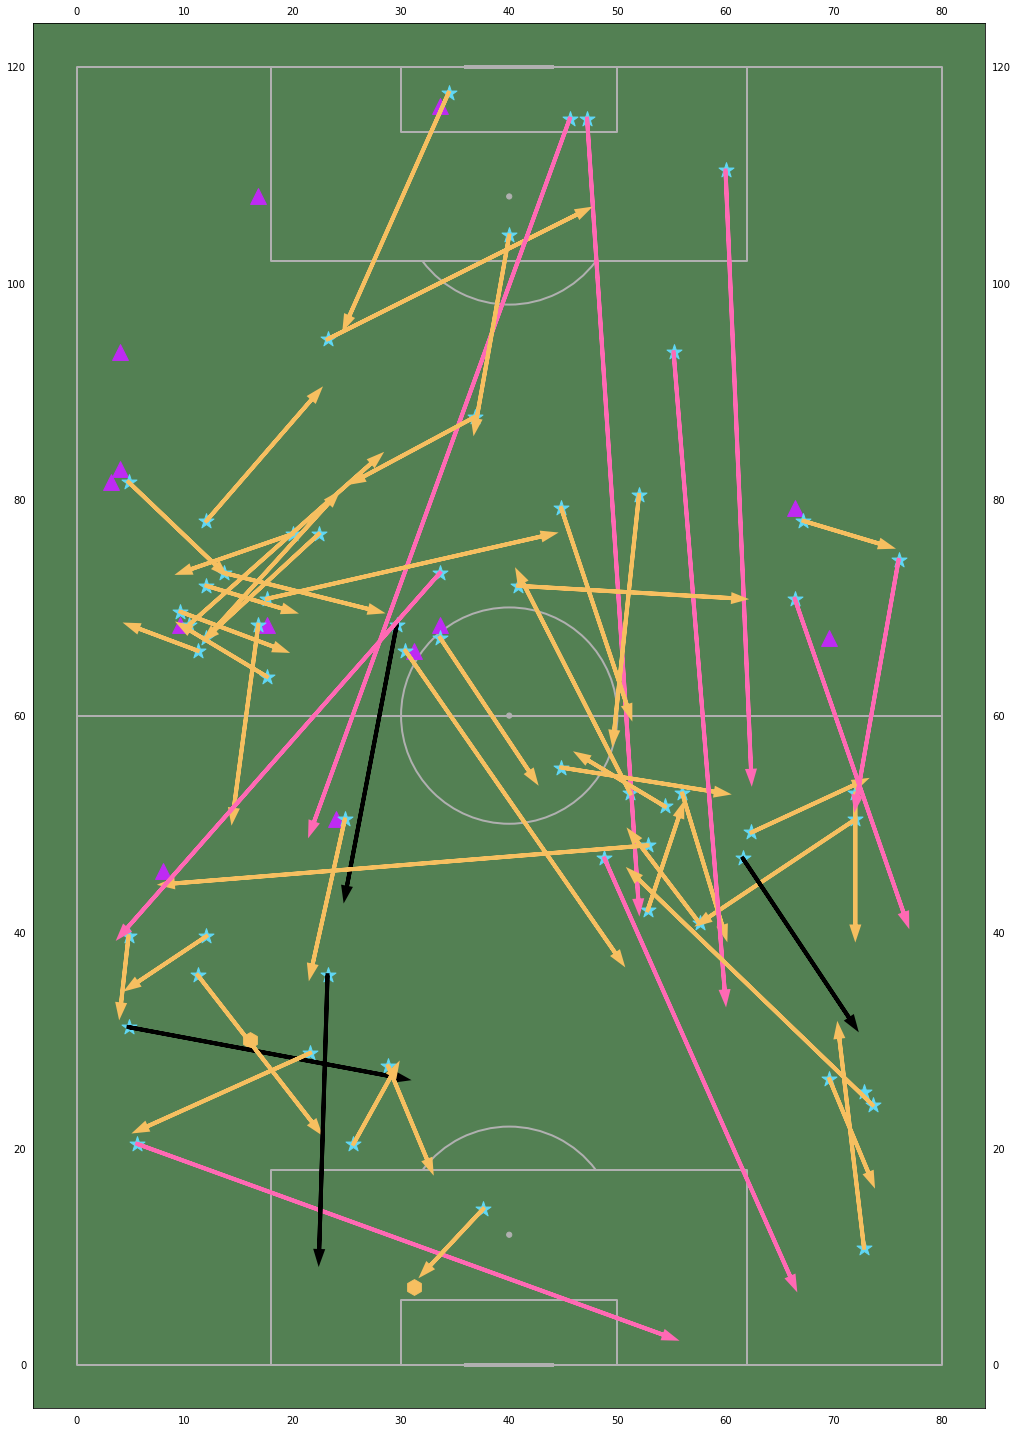

In [41]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataAwayDef['Y'],dataAwayDef['X'],c='#BE2AF3',s = 250,marker = "^")

plt.scatter(dataAwayPass['Y'],dataAwayPass['X'],c='#60D8F6',s = 250 ,marker = '*')

plt.scatter(dataAwayShot['Y'],dataAwayShot['X'],c='#F6BF60',s = 250,marker = "h")
for i in range(len(pStyA)):
    if(pStyA[i] == 'Cross'):
        plt.arrow(pDrtyA[i],pDrtxA[i],pDesyA[i]-pDrtyA[i],pDesxA[i]-pDrtxA[i], color = '#FF69B4',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')
    if(pStyA[i] == 'Through'):
        plt.arrow(pDrtyA[i],pDrtxA[i],pDesyA[i]-pDrtyA[i],pDesxA[i]-pDrtxA[i], color = '#000000',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')
    if(pStyA[i] == 'Pass'):
         plt.arrow(pDrtyA[i],pDrtxA[i],pDesyA[i]-pDrtyA[i],pDesxA[i]-pDrtxA[i],color ='#F6BF60',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')


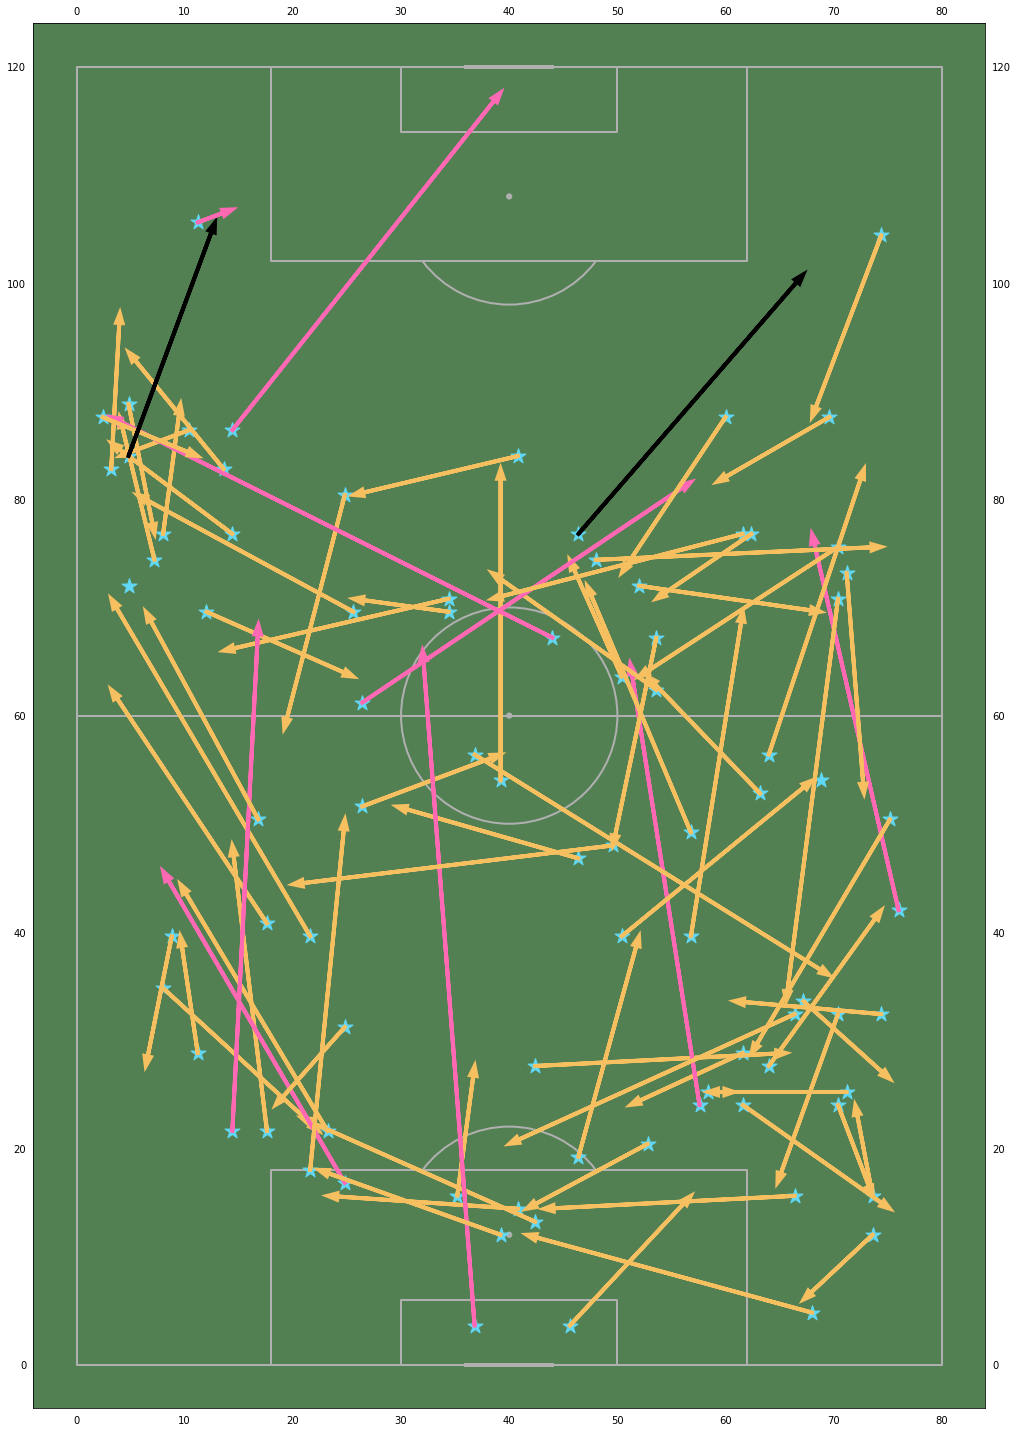

In [42]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))


plt.scatter(dataHomePass['Y'],dataHomePass['X'],c='#60D8F6',s = 250 ,marker = '*')

for i in range(len(pStyH)):
    if(pStyH[i] == 'Cross'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#FF69B4',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Through'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#000000',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Pass'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#F6BF60',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')
